### **ЛР 3**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

data = pd.DataFrame(pd.read_csv("/content/sample_data/advertising.csv"))
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Рассчитаем зависимость продаж от бюджета рекламы на тв.
Удалим ненужные строки:

In [14]:
data = data.drop(columns=['Radio', 'Newspaper'])
sortData = data.sort_values(by=["TV", "Sales"])

Создадим тренировочные наборы и построим модель линейной регрессии

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(sortData['TV'], sortData['Sales'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

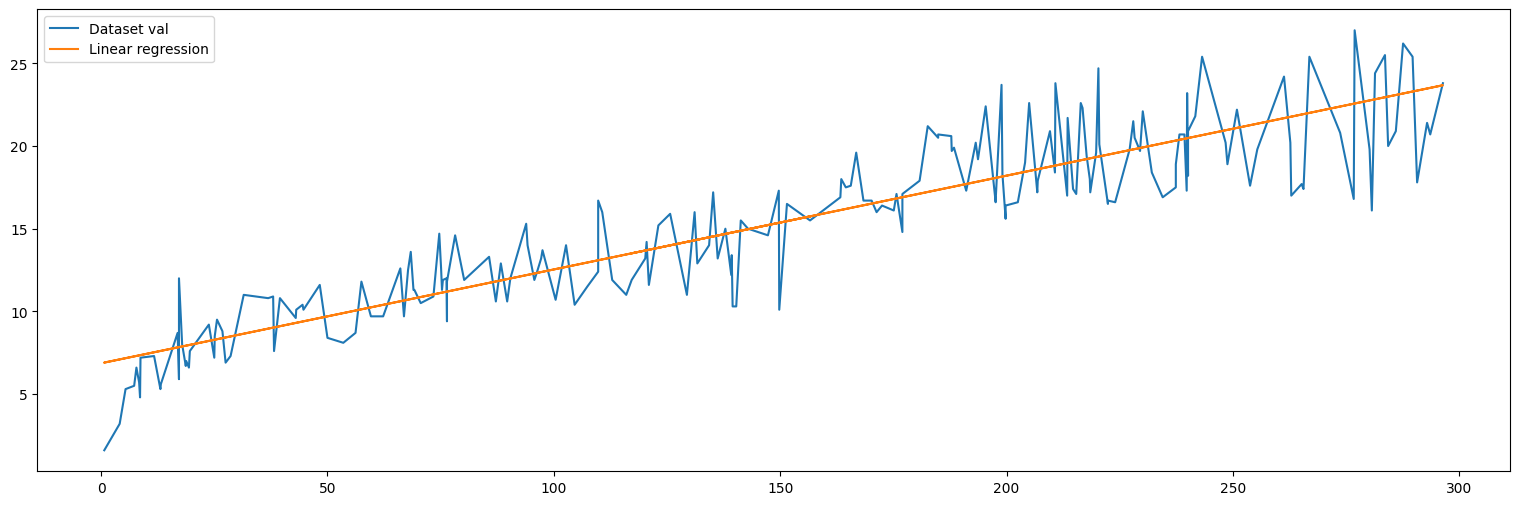

In [16]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(sortData['TV'], sortData['Sales'], label='Dataset val')
ax.plot(X_train, model.predict(X_train), label='Linear regression')
ax.legend()
plt.show()

Рассчитаем метрики:

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE = %s" % mean_absolute_error(model.predict(X_test), y_test))
print('MSE = %s' % mean_squared_error(model.predict(X_test), y_test))

MAE = 1.8699200384482204
MSE = 5.147628746375896


### **ЛР 4**

In [21]:
from catboost import CatBoostRegressor
     

catModel = CatBoostRegressor(iterations=2500,
                          learning_rate=0.1,
                          depth=6,
                          random_state=740)

catModel.fit(X_train, y_train, verbose=100)


y_pred = catModel.predict(X_test)

0:	learn: 5.0817074	total: 50.2ms	remaining: 2m 5s
100:	learn: 1.7787194	total: 170ms	remaining: 4.04s
200:	learn: 1.4707409	total: 333ms	remaining: 3.8s
300:	learn: 1.2864996	total: 433ms	remaining: 3.16s
400:	learn: 1.1577442	total: 539ms	remaining: 2.82s
500:	learn: 1.0261305	total: 624ms	remaining: 2.49s
600:	learn: 0.9134006	total: 696ms	remaining: 2.2s
700:	learn: 0.8317847	total: 763ms	remaining: 1.96s
800:	learn: 0.7589496	total: 802ms	remaining: 1.7s
900:	learn: 0.6931781	total: 892ms	remaining: 1.58s
1000:	learn: 0.6462348	total: 937ms	remaining: 1.4s
1100:	learn: 0.5969429	total: 982ms	remaining: 1.25s
1200:	learn: 0.5592470	total: 1.11s	remaining: 1.2s
1300:	learn: 0.5204028	total: 1.2s	remaining: 1.11s
1400:	learn: 0.4925911	total: 1.32s	remaining: 1.04s
1500:	learn: 0.4669413	total: 1.43s	remaining: 953ms
1600:	learn: 0.4454036	total: 1.59s	remaining: 895ms
1700:	learn: 0.4316918	total: 1.69s	remaining: 795ms
1800:	learn: 0.4181320	total: 1.8s	remaining: 701ms
1900:	learn

In [23]:
mse = mean_squared_error(y_pred, y_test)
print('MSE = %s' % mse)
print("MAE = %s" % mean_absolute_error(
    y_pred, y_test)
)

MSE = 7.8783816989146995
MAE = 2.1003945749219572


In [24]:
import lightgbm as lgb
     

lightBmModel = lgb.LGBMRegressor(num_leaves=31,
                          learning_rate=0.1, 
                          n_estimators=100, 
                          random_state=42) 
lightBmModel.fit(X_train, y_train, verbose=10)

y_pred = lightBmModel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [25]:
mse = mean_squared_error(y_pred, y_test)
print('MSE = %s' % mse)
print("MAE = %s" % mean_absolute_error(y_pred, y_test))

MSE = 4.737600712328528
MAE = 1.7295559426607312


In [26]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 0.1,
    'min_child_weight': 1,
    'seed': 42
}

num_rounds = 100
xgbModel = xgb.train(params, dtrain, num_rounds)

y_pred = xgbModel.predict(dtest)

mse = mean_squared_error(y_pred, y_test)
print('MSE = %s' % mse)
print("MAE = %s" % mean_absolute_error(y_pred, y_test))

MSE = 5.177598274124425
MAE = 1.7899733638763429


Лучший результат показал lightgbm, чуть хуже xgboost и худший результат у catboost.